<a href="https://colab.research.google.com/github/eftekhar-hossain/SKBI_Training/blob/main/Session_14_Vision_CNN_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <u> <font color='red'> Training on AI and ML with Python (Intermediate) </font> </u> </h1> </center>

#Session-14: Convolutional Neural Network


###Objective: 
1. *Construct CNN architecture for computer vision application.*
2. *Get familiar Data Augmentation and Transfer Learning.*

 



In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import the libraries

In [2]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt       

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler

# Deep learning Librarires


import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Input, Dense, Activation, Dropout, RandomRotation, RandomZoom
from keras.layers import Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [ ]:
print(tf.__version__)

2.12.0


##Handwritten Digit Dataset

In [ ]:
# Download the train data
!wget -O mnist_train.csv https://www.dropbox.com/s/yrqwhkqj8914h9l/mnist_train.csv?dl=0

In [ ]:
# Download the test data
!wget -O mnist_test.csv https://www.dropbox.com/s/3c02b49hcze40i6/mnist_test.csv?dl=0

In [ ]:
"""importing the dataset """

train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# print first five row
train_data.head()

In [6]:
# drop the first column 
train_images = train_data.iloc[:,1:]
train_labels = train_data.iloc[:,0:1]
# train_labels

#train_images

In [ ]:
# count the labels distribution
train_labels.value_counts()

In [7]:
# drop the first column 
test_images = test_data.iloc[:,1:]
test_labels = test_data.iloc[:,0:1]
# test_labels

#test_images

In [8]:
train_images.shape

(60000, 784)

In [14]:
train_images_arr = train_images.values.reshape(-1,28,28,1)
test_images_arr = test_images.values.reshape(-1,28,28,1)

In [10]:
print("Training Set: ",train_images_arr.shape)
print("Test Set: ", test_images_arr.shape)

Training Set:  (60000, 28, 28, 1)
Test Set:  (10000, 28, 28, 1)


## Plotting some digits

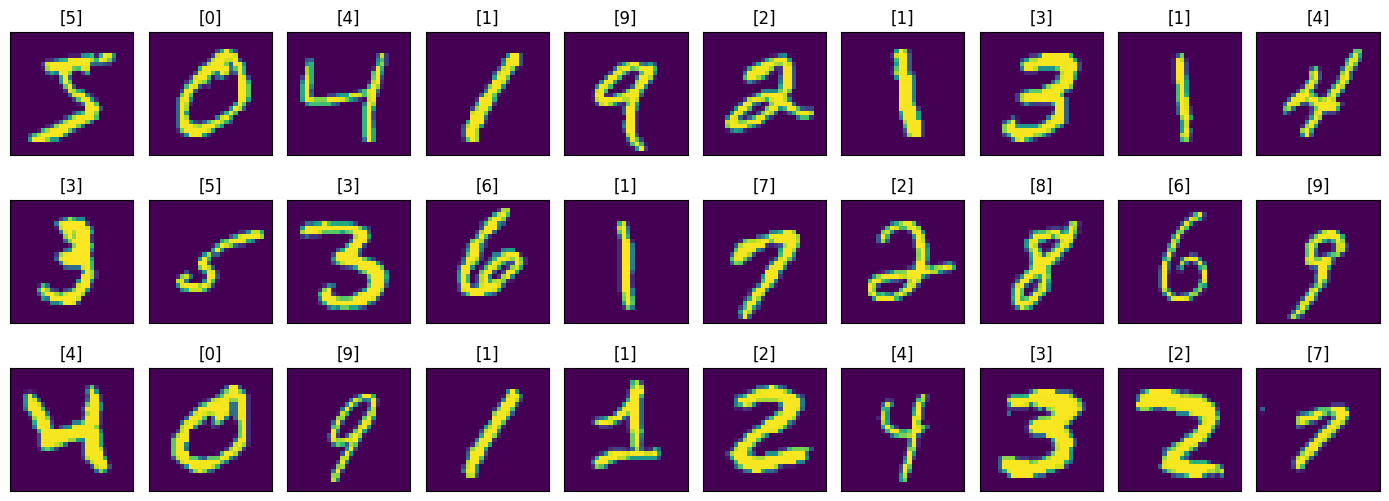

In [11]:
# Plotting some digits

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = train_images.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"{train_labels.iloc[digit_num].values}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

##Convolutional Neural Network

In [15]:
# Functional API

num_classes = 10

def model():
    inputs = Input(shape=(28,28,1))
    # Conv Layer 1
    x = Conv2D(24, kernel_size=(3,3), padding='same', activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2),)(x)
    # Conv Layer 2
    x = Conv2D(48, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # Conv Layer 3
    x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    # Flatten
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)
    output = Dense(num_classes, activation="softmax")(x)
    
    model = Model(inputs,output)
    
    model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
    return model

In [16]:
cnn = model()
cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 48)        10416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          27712 

In [ ]:
# You can also plot the model as a graph:
keras.utils.plot_model(cnn, "my_first_model_with_shape_info.png", show_shapes=True)

##Training

In [18]:
keras.backend.clear_session()

  # Saved the Best Model
filepath = "mymodel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [checkpoint] 


In [19]:
history = cnn.fit(train_images_arr, train_labels, batch_size=64, epochs=10, validation_split=0.1, callbacks = callback_list)


Epoch 1/10
844/844 [==============================] - ETA: 0s - loss: 0.4275 - accuracy: 0.9080
Epoch 1: val_accuracy improved from -inf to 0.98150, saving model to mymodel.h5
844/844 [==============================] - 16s 6ms/step - loss: 0.4275 - accuracy: 0.9080 - val_loss: 0.0595 - val_accuracy: 0.9815
Epoch 2/10
833/844 [============================>.] - ETA: 0s - loss: 0.0891 - accuracy: 0.9730
Epoch 2: val_accuracy improved from 0.98150 to 0.98350, saving model to mymodel.h5
844/844 [==============================] - 4s 5ms/step - loss: 0.0893 - accuracy: 0.9730 - val_loss: 0.0542 - val_accuracy: 0.9835
Epoch 3/10
836/844 [============================>.] - ETA: 0s - loss: 0.0647 - accuracy: 0.9806
Epoch 3: val_accuracy improved from 0.98350 to 0.98700, saving model to mymodel.h5
844/844 [==============================] - 4s 4ms/step - loss: 0.0645 - accuracy: 0.9806 - val_loss: 0.0410 - val_accuracy: 0.9870
Epoch 4/10
842/844 [============================>.] - ETA: 0s - loss: 0.

In [20]:
# Recreate the exact same model purely from the file:
model = load_model("mymodel.h5")

In [ ]:
y_pred = np.argmax(model.predict(test_images_arr), axis=-1)
y_pred

In [22]:
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Plot Accuracy and Loss

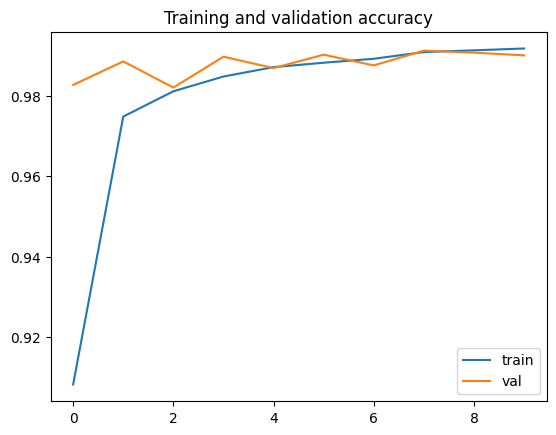

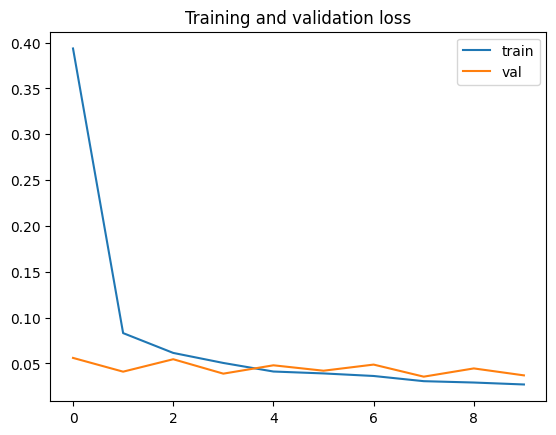

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )

plt.title ('Training and validation accuracy')
plt.legend(['train', 'val'])
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )
plt.legend(['train', 'val'])

# Task



**Ekush: A Multipurpose and Multitype Comprehensive Database for Online Off-line Bangla Handwritten Characters. Ekush has several features:**

 - Characters Recognition
 - Recognition in context
 - Gender Identification
 - Forensic Investigation
 - 673,482‬ character instances
 - 242 character class
 - 4 captions per image
 - 340,243‬ Female data
 - 333,239‬ Male data

In [ ]:
# run the cell to download the data
!wget -O ekush.zip https://www.dropbox.com/s/sym70dkootl09va/ekushCSV.zip?dl=0


In [ ]:
# extract the zip file and save the files into bangla-digit folder
import zipfile
zip_ref = zipfile.ZipFile("ekush.zip", 'r')
zip_ref.extractall("bangla-digit")
zip_ref.close()

#Custom Dataset: Plant Disease

In [ ]:
!wget -O Plant_Images.zip https://www.dropbox.com/s/w3i2anpmyvvuhxz/Plant_Images.zip?dl=0

In [24]:
# extract the zip file and save the files into bangla-digit folder
import zipfile
zip_ref = zipfile.ZipFile("Plant_Images.zip", 'r')
zip_ref.extractall("data")
zip_ref.close()

In [25]:
import os
path = '/content/data/Plant Disease/'
categories = os.listdir(path)
num_classes = len(categories)
print(num_classes)

4


In [26]:
categories

['Healthy', 'Blight', 'Common_Rust', 'Gray_Leaf_Spot']

##Split Train Test Split

In [27]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=(100,100),
    batch_size=32,
    class_names=categories,
    label_mode='categorical',
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=(100,100),
    batch_size=32,
    class_names=categories,
    label_mode='categorical',
)

Found 4188 files belonging to 4 classes.
Using 3351 files for training.
Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [30]:
3351/32

104.71875

In [28]:
train_ds, val_ds = tf.keras.utils.split_dataset(train_data, left_size=0.9)
print(int(train_ds.cardinality()))
print(int(val_ds.cardinality()))


95
11


In [ ]:
for images,targets in train_ds.take(1):
  print(images)
  print(targets)

##Visualizaiton Samples

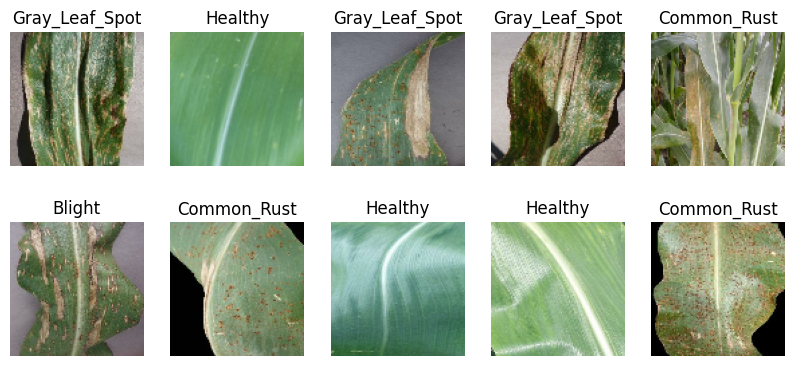

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
for images, labels in train_ds.take(1):
    for i in range(10):
        ax = plt.subplot(3, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(categories[np.argmax(labels[i])])
        plt.axis("off")

In [33]:
for i in categories:
    directory = os.path.join(path, i)
    print("Images of label \"" + i + "\":\t", len(os.listdir(directory)))

Images of label "Healthy":	 1162
Images of label "Blight":	 1146
Images of label "Common_Rust":	 1306
Images of label "Gray_Leaf_Spot":	 574


##Convolutional Neural Network

In [34]:
# Functional API

num_classes = 4

def model():
    inputs = Input(shape=(100,100,3))
    x = Conv2D(24, kernel_size=(3,3), padding='same', activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(48, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)
    output = Dense(num_classes, activation="softmax")(x)
    
    model = Model(inputs,output)
    
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
    return model

In [35]:
cnn = model()
#cnn.summary()

##Training

In [36]:
keras.backend.clear_session()

  # Saved the Best Model
filepath = "mymodel_disease.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [checkpoint] 


In [40]:
history = cnn.fit(train_ds, batch_size=32, epochs=10, validation_data = val_ds, callbacks = callback_list)


Epoch 1/10
95/95 [==============================] - ETA: 0s - loss: 8.0422 - accuracy: 0.6946
Epoch 1: val_accuracy improved from -inf to 0.83284, saving model to mymodel_disease.h5
95/95 [==============================] - 4s 17ms/step - loss: 8.0422 - accuracy: 0.6946 - val_loss: 0.4343 - val_accuracy: 0.8328
Epoch 2/10
92/95 [============================>.] - ETA: 0s - loss: 0.4629 - accuracy: 0.8145
Epoch 2: val_accuracy improved from 0.83284 to 0.83881, saving model to mymodel_disease.h5
95/95 [==============================] - 1s 12ms/step - loss: 0.4598 - accuracy: 0.8166 - val_loss: 0.4596 - val_accuracy: 0.8388
Epoch 3/10
90/95 [===========================>..] - ETA: 0s - loss: 0.4067 - accuracy: 0.8413
Epoch 3: val_accuracy improved from 0.83881 to 0.85672, saving model to mymodel_disease.h5
95/95 [==============================] - 1s 12ms/step - loss: 0.4006 - accuracy: 0.8432 - val_loss: 0.3898 - val_accuracy: 0.8567
Epoch 4/10
92/95 [============================>.] - ETA: 0

In [41]:
# Recreate the exact same model purely from the file:
model = load_model("mymodel_disease.h5")

##Evaluation

In [42]:
score = model.evaluate(test_ds, verbose = 0)
print('Test accuracy:', score[1])

Test accuracy: 0.8506571054458618


In [43]:
def pred(model):
    y_val = []
    y_val_pred = []
    for images, targets in test_ds:
        for image, target in zip(images, targets):
            img_array = image.numpy().astype("uint8")
            prediction = model.predict(np.array([img_array]))
            y_val_pred.append(np.argmax(prediction))
            y_val.append(np.argmax(target))
            
    return y_val, y_val_pred

In [ ]:
y_val, y_val_pred=pred(cnn)    

In [45]:
cm = confusion_matrix(y_val, y_val_pred)
cm

array([[231,   1,   0,   0],
       [  3, 181,   2,  35],
       [  7,  15, 234,   9],
       [  2,  39,   0,  78]])

In [46]:
print(classification_report(y_val, y_val_pred,target_names =categories ))

                precision    recall  f1-score   support

       Healthy       0.95      1.00      0.97       232
        Blight       0.77      0.82      0.79       221
   Common_Rust       0.99      0.88      0.93       265
Gray_Leaf_Spot       0.64      0.66      0.65       119

      accuracy                           0.86       837
     macro avg       0.84      0.84      0.84       837
  weighted avg       0.87      0.86      0.87       837



##Data Augmentation

In [ ]:
# Functional API

num_classes = 4

def model():
    inputs = Input(shape=(100,100,3))
    
    # Data Augmentation
    x = RandomRotation(0.1)(inputs)
    x = RandomZoom(0.1)(x)
    
    x = Conv2D(24, kernel_size=(3,3), padding='same', activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(48, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)
    output = Dense(num_classes, activation="softmax")(x)
    
    model = Model(inputs,output)
    
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
    return model

In [ ]:
cnn = model()
#cnn.summary()

##Training

In [ ]:
keras.backend.clear_session()

  # Saved the Best Model
filepath = "mymodel_disease.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [checkpoint] 


In [ ]:
history = cnn.fit(train_ds, batch_size=32, epochs=10, validation_data = val_ds, callbacks = callback_list)


Epoch 1/10
90/95 [===========================>..] - ETA: 0s - loss: 6.1988 - accuracy: 0.6892
Epoch 1: val_accuracy improved from -inf to 0.80896, saving model to mymodel_disease.h5
95/95 [==============================] - 4s 14ms/step - loss: 5.9402 - accuracy: 0.6940 - val_loss: 0.4950 - val_accuracy: 0.8090
Epoch 2/10
92/95 [============================>.] - ETA: 0s - loss: 0.4327 - accuracy: 0.8244
Epoch 2: val_accuracy improved from 0.80896 to 0.82090, saving model to mymodel_disease.h5
95/95 [==============================] - 1s 12ms/step - loss: 0.4287 - accuracy: 0.8259 - val_loss: 0.4735 - val_accuracy: 0.8209
Epoch 3/10
90/95 [===========================>..] - ETA: 0s - loss: 0.3523 - accuracy: 0.8587
Epoch 3: val_accuracy improved from 0.82090 to 0.84478, saving model to mymodel_disease.h5
95/95 [==============================] - 1s 12ms/step - loss: 0.3490 - accuracy: 0.8597 - val_loss: 0.4606 - val_accuracy: 0.8448
Epoch 4/10
90/95 [===========================>..] - ETA: 0

In [ ]:
# Recreate the exact same model purely from the file:
model = load_model("mymodel_disease.h5")

##Evaluation

In [ ]:
score = model.evaluate(test_ds, verbose = 0)
print('Test accuracy:', score[1])

Test accuracy: 0.8649940490722656


In [ ]:
def pred(model):
    y_val = []
    y_val_pred = []
    for images, targets in test_ds:
        for image, target in zip(images, targets):
            img_array = image.numpy().astype("uint8")
            prediction = model.predict(np.array([img_array]))
            y_val_pred.append(np.argmax(prediction))
            y_val.append(np.argmax(target))
            
    return y_val, y_val_pred

In [ ]:
y_val, y_val_pred=pred(cnn)    

In [ ]:
cm = confusion_matrix(y_val, y_val_pred)
cm

array([[235,   6,  18,   6],
       [  1,  57,  60,   1],
       [  2,  19, 199,   1],
       [  0,   0,   0, 232]])

In [ ]:
print(classification_report(y_val, y_val_pred,target_names =categories ))

                precision    recall  f1-score   support

   Common_Rust       0.99      0.89      0.93       265
Gray_Leaf_Spot       0.70      0.48      0.57       119
        Blight       0.72      0.90      0.80       221
       Healthy       0.97      1.00      0.98       232

      accuracy                           0.86       837
     macro avg       0.84      0.82      0.82       837
  weighted avg       0.87      0.86      0.86       837



#[Transfer Learning](https://keras.io/guides/transfer_learning/)

### Feature Extraction

In [48]:
# Pretrained Models
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50

In [49]:
base_model = VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(100, 100, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

58889256/58889256 [==============================] - 0s 0us/step


In [50]:
# freeze the base model.
base_model.trainable = False

In [ ]:
inputs = Input(shape=(100, 100, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. 
x = base_model.output
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = GlobalAveragePooling2D()(x)
# A Dense classifier with a 4 unit (multiclass classification)
output = Dense(4, activation = 'softmax')(x)
model = Model(inputs = base_model.input, outputs = output)
model.summary()

####Training

In [53]:
keras.backend.clear_session()

  # Saved the Best Model
filepath = "tl_disease.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [checkpoint] 


In [54]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), 
              metrics=['accuracy'])

In [56]:
history = model.fit(train_ds, batch_size=32, epochs=20, validation_data = val_ds, callbacks = callback_list)


Epoch 1/20
95/95 [==============================] - ETA: 0s - loss: 1.1803 - accuracy: 0.7954
Epoch 1: val_accuracy improved from -inf to 0.81493, saving model to tl_disease.h5
95/95 [==============================] - 5s 51ms/step - loss: 1.1803 - accuracy: 0.7954 - val_loss: 0.7760 - val_accuracy: 0.8149
Epoch 2/20
93/95 [============================>.] - ETA: 0s - loss: 0.7891 - accuracy: 0.8380
Epoch 2: val_accuracy improved from 0.81493 to 0.85373, saving model to tl_disease.h5
95/95 [==============================] - 3s 36ms/step - loss: 0.7893 - accuracy: 0.8379 - val_loss: 0.6198 - val_accuracy: 0.8537
Epoch 3/20
93/95 [============================>.] - ETA: 0s - loss: 0.5996 - accuracy: 0.8619
Epoch 3: val_accuracy improved from 0.85373 to 0.86567, saving model to tl_disease.h5
95/95 [==============================] - 3s 36ms/step - loss: 0.6003 - accuracy: 0.8617 - val_loss: 0.5424 - val_accuracy: 0.8657
Epoch 4/20
95/95 [==============================] - ETA: 0s - loss: 0.482

In [57]:
# Recreate the exact same model purely from the file:
model = load_model("tl_disease.h5")

####Evaluation

In [58]:
score = model.evaluate(test_ds, verbose = 0)
print('Test accuracy:', score[1])

Test accuracy: 0.8733572363853455


In [ ]:
def pred(model):
    y_val = []
    y_val_pred = []
    for images, targets in test_ds:
        for image, target in zip(images, targets):
            img_array = image.numpy().astype("uint8")
            prediction = model.predict(np.array([img_array]))
            y_val_pred.append(np.argmax(prediction))
            y_val.append(np.argmax(target))
            
    return y_val, y_val_pred

In [ ]:
y_val, y_val_pred=pred(model)    

In [ ]:
cm = confusion_matrix(y_val, y_val_pred)
cm

array([[248,   5,  10,   2],
       [  3,  76,  39,   1],
       [  7,  31, 180,   3],
       [  1,   0,   3, 228]])

In [ ]:
print(classification_report(y_val, y_val_pred,target_names =categories ))

                precision    recall  f1-score   support

   Common_Rust       0.96      0.94      0.95       265
Gray_Leaf_Spot       0.68      0.64      0.66       119
        Blight       0.78      0.81      0.79       221
       Healthy       0.97      0.98      0.98       232

      accuracy                           0.87       837
     macro avg       0.85      0.84      0.84       837
  weighted avg       0.87      0.87      0.87       837



###Fine-Tunning

In [59]:
## Fine Tuning

base_model = VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(100, 100, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [60]:
# freeze the base model.
base_model.trainable = True

In [61]:
inputs = Input(shape=(100, 100, 3))
x = base_model.output
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = GlobalAveragePooling2D()(x)
# A Dense classifier with a 4 unit (multiclass classification)
output = Dense(4, activation = 'softmax')(x)
model = Model(inputs = base_model.input, outputs = output)
# model.summary()

####Training

In [62]:
keras.backend.clear_session()

  # Saved the Best Model
filepath = "tl_disease.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [checkpoint] 


In [63]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(1e-5), 
              metrics=['accuracy'])

In [64]:
history = model.fit(train_ds, batch_size=32, epochs=20, validation_data = val_ds, callbacks = callback_list)


Epoch 1/20
95/95 [==============================] - ETA: 0s - loss: 0.8418 - accuracy: 0.7805
Epoch 1: val_accuracy improved from -inf to 0.87761, saving model to tl_disease.h5
95/95 [==============================] - 18s 119ms/step - loss: 0.8418 - accuracy: 0.7805 - val_loss: 0.3601 - val_accuracy: 0.8776
Epoch 2/20
94/95 [============================>.] - ETA: 0s - loss: 0.2373 - accuracy: 0.9079
Epoch 2: val_accuracy improved from 0.87761 to 0.90149, saving model to tl_disease.h5
95/95 [==============================] - 10s 109ms/step - loss: 0.2368 - accuracy: 0.9082 - val_loss: 0.2930 - val_accuracy: 0.9015
Epoch 3/20
95/95 [==============================] - ETA: 0s - loss: 0.1185 - accuracy: 0.9605
Epoch 3: val_accuracy improved from 0.90149 to 0.91940, saving model to tl_disease.h5
95/95 [==============================] - 10s 110ms/step - loss: 0.1185 - accuracy: 0.9605 - val_loss: 0.2825 - val_accuracy: 0.9194
Epoch 4/20
95/95 [==============================] - ETA: 0s - loss:

In [65]:
# Recreate the exact same model purely from the file:
model = load_model("tl_disease.h5")

####Evaluation

In [66]:
score = model.evaluate(test_ds, verbose = 0)
print('Test accuracy:', score[1])

Test accuracy: 0.9211469292640686


In [ ]:
def pred(model):
    y_val = []
    y_val_pred = []
    for images, targets in test_ds:
        for image, target in zip(images, targets):
            img_array = image.numpy().astype("uint8")
            prediction = model.predict(np.array([img_array]))
            y_val_pred.append(np.argmax(prediction))
            y_val.append(np.argmax(target))
            
    return y_val, y_val_pred

In [ ]:
y_val, y_val_pred=pred(model)    

In [ ]:
cm = confusion_matrix(y_val, y_val_pred)
cm

array([[247,   5,  10,   3],
       [  4,  89,  26,   0],
       [  4,  14, 203,   0],
       [  1,   1,   0, 230]])

In [ ]:
print(classification_report(y_val, y_val_pred,target_names =categories ))

                precision    recall  f1-score   support

   Common_Rust       0.96      0.93      0.95       265
Gray_Leaf_Spot       0.82      0.75      0.78       119
        Blight       0.85      0.92      0.88       221
       Healthy       0.99      0.99      0.99       232

      accuracy                           0.92       837
     macro avg       0.90      0.90      0.90       837
  weighted avg       0.92      0.92      0.92       837



#Task 1: Weather Classification

In [ ]:
!wget -O weather.zip https://www.dropbox.com/s/c833cgkdfuook1l/Weather-dataset.zip?dl=0

#Task 2: Image Tampering Detection

In [ ]:
https://www.kaggle.com/datasets/divg07/casia-20-image-tampering-detection-dataset

#Task 3: Drowsiness Detection

In [ ]:
https://www.kaggle.com/datasets/prasadvpatil/mrl-dataset

#Task 4: Disaster Identification

In [ ]:
https://www.kaggle.com/datasets/rupakroy/cyclone-wildfire-flood-earthquake-database

#Task 5: Human Action Recognition

In [ ]:
https://www.kaggle.com/datasets/meetnagadia/human-action-recognition-har-dataset